In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crop_yield_data = "./raw_data/crop_yield_dataset.csv"
crop_data = "./raw_data/sensor_Crop_Dataset.csv"

In [3]:
df1 = pd.read_csv(crop_yield_data)
df2 = pd.read_csv(crop_data)

print(f"Columns of df1: {df1.columns}")
print(f"Columns of df2: {df2.columns}")
print(f"Length of df1: {len(df1)}")
print(f"Length of df2: {len(df2)}")

Columns of df1: Index(['Date', 'Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity',
       'Wind_Speed', 'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality'],
      dtype='object')
Columns of df2: Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop', 'Soil_Type', 'Variety'],
      dtype='object')
Length of df1: 36520
Length of df2: 20000


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36520 entries, 0 to 36519
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          36520 non-null  object 
 1   Crop_Type     36520 non-null  object 
 2   Soil_Type     36520 non-null  object 
 3   Soil_pH       36520 non-null  float64
 4   Temperature   36520 non-null  float64
 5   Humidity      36520 non-null  float64
 6   Wind_Speed    36520 non-null  float64
 7   N             36520 non-null  float64
 8   P             36520 non-null  float64
 9   K             36520 non-null  float64
 10  Crop_Yield    36520 non-null  float64
 11  Soil_Quality  36520 non-null  float64
dtypes: float64(9), object(3)
memory usage: 3.3+ MB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     20000 non-null  float64
 1   Phosphorus   20000 non-null  float64
 2   Potassium    20000 non-null  float64
 3   Temperature  20000 non-null  float64
 4   Humidity     20000 non-null  float64
 5   pH_Value     20000 non-null  float64
 6   Rainfall     20000 non-null  float64
 7   Crop         20000 non-null  object 
 8   Soil_Type    20000 non-null  object 
 9   Variety      20000 non-null  object 
dtypes: float64(7), object(3)
memory usage: 1.5+ MB


In [6]:
df1.isna().sum().sum(),df2.isna().sum().sum()

(np.int64(0), np.int64(0))

In [7]:
df1.head()

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667


In [8]:
df2.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Soil_Type,Variety
0,69.074766,53.954402,88.067625,17.261834,72.941652,4.631301,302.842639,Wheat,Clay,Soft Red
1,107.329352,70.102134,32.081067,21.846116,99.361954,4.761658,94.693847,Tomato,Clay,Beefsteak
2,130.634624,67.204533,28.294252,33.246895,81.506836,6.566007,83.563685,Sugarcane,Clay,Co 86032
3,15.169301,87.493181,14.336679,14.396289,59.274465,6.296297,31.508836,Sugarcane,Silt,Co 0238
4,21.881965,89.269712,38.833885,16.773218,51.191584,8.268274,295.193482,Maize,Sandy,Sweet


#### Printing only unique values in crop feature from 2 datasets

In [12]:
df1["Crop_Type"].unique(),df2["Crop"].unique()

(array(['Wheat', 'Corn', 'Rice', 'Barley', 'Soybean', 'Cotton',
        'Sugarcane', 'Tomato', 'Potato', 'Sunflower'], dtype=object),
 array(['Wheat', 'Tomato', 'Sugarcane', 'Corn', 'Potato', 'Rice'],
       dtype=object))

#### Replacing maize -> corn and only including common crops

In [16]:
# Standardize crop names
crop_map = {
    "Maize": "Corn"   
}

df1["Crop_Type"] = df1["Crop_Type"].replace(crop_map)
df2["Crop"] = df2["Crop"].replace(crop_map)


common_crops = set(df1["Crop_Type"].unique()) & set(df2["Crop"].unique())
print("Common Crops:", common_crops)

df1 = df1[df1["Crop_Type"].isin(common_crops)]
df2 = df2[df2["Crop"].isin(common_crops)]
len(df1["Crop_Type"].unique()),len(df2["Crop"].unique())

Common Crops: {'Corn', 'Tomato', 'Potato', 'Wheat', 'Sugarcane', 'Rice'}


(6, 6)

#### Checking soil data

In [ ]:
df1["Soil_Type"].unique(),df2["Soil_Type"].unique()

(array(['Peaty', 'Loamy', 'Saline', 'Clay', 'Sandy'], dtype=object),
 array(['Clay', 'Silt', 'Sandy', 'Saline', 'Peaty', 'Loamy'], dtype=object))

In [39]:
common_soils = set(df1["Soil_Type"].unique()) & set(df2["Soil_Type"].unique())
df1 = df1[df1["Soil_Type"].isin(common_soils)]
df2 = df2[df2["Soil_Type"].isin(common_soils)]
df1["Soil_Type"].unique(),df2["Soil_Type"].unique()

(array(['Peaty', 'Loamy', 'Saline', 'Clay', 'Sandy'], dtype=object),
 array(['Clay', 'Sandy', 'Saline', 'Peaty', 'Loamy'], dtype=object))

In [57]:
print("Max Values")
print(f"Nitrogen:\n df1: {max(df1["N"].unique())}\n df2: {max(df2["N"].unique())}")
print(f"Potassium:\n df1: {max(df1["K"].unique())}\n df2: {max(df2["K"].unique())}")
print(f"Phosphorus:\n df1: {max(df1["P"].unique())}\n df2: {max(df2["P"].unique())}")
print("="*30)
print("Min Values")
print(f"Nitrogen:\n df1: {min(df1["N"].unique())}\n df2: {min(df2["N"].unique())}")
print(f"Potassium:\n df1: {min(df1["K"].unique())}\n df2: {min(df2["K"].unique())}")
print(f"Phosphorus:\n df1: {min(df1["P"].unique())}\n df2: {min(df2["P"].unique())}")



Max Values
Nitrogen:
 df1: 91.0
 df2: 149.99878518342774
Potassium:
 df1: 60.0
 df2: 99.99648016878344
Phosphorus:
 df1: 72.0
 df2: 89.99908577133665
Min Values
Nitrogen:
 df1: 50.0
 df2: 5.007562001082032
Potassium:
 df1: 27.0
 df2: 10.000672162993624
Phosphorus:
 df1: 36.0
 df2: 5.012749985492234


### Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df1[["N","P","K"]] = scaler.fit_transform(df1[["N","P","K"]])
df2[["N","P","K"]] = scaler.transform(df2[["N","P","K"]])

In [59]:
print("Max Values")
print(f"Nitrogen:\n df1: {max(df1["N"].unique())}\n df2: {max(df2["N"].unique())}")
print(f"Potassium:\n df1: {max(df1["K"].unique())}\n df2: {max(df2["K"].unique())}")
print(f"Phosphorus:\n df1: {max(df1["P"].unique())}\n df2: {max(df2["P"].unique())}")
print("="*30)
print("Min Values")
print(f"Nitrogen:\n df1: {min(df1["N"].unique())}\n df2: {min(df2["N"].unique())}")
print(f"Potassium:\n df1: {min(df1["K"].unique())}\n df2: {min(df2["K"].unique())}")
print(f"Phosphorus:\n df1: {min(df1["P"].unique())}\n df2: {min(df2["P"].unique())}")



Max Values
Nitrogen:
 df1: 1.0000000000000002
 df2: 2.4389947605714086
Potassium:
 df1: 1.0
 df2: 2.212014550569195
Phosphorus:
 df1: 1.0
 df2: 1.4999746047593514
Min Values
Nitrogen:
 df1: 0.0
 df2: -1.0973765365589747
Potassium:
 df1: 0.0
 df2: -0.5151311465759508
Phosphorus:
 df1: 0.0
 df2: -0.8607569448474379


# To - Do
1. Thinking of merging these two datasets
* Removing unnecessary features like 
* Renaming the features

In [40]:
df1 = df1.rename(columns={
    "Crop_Type": "Crop",
    "Soil_pH": "pH",
    "N": "N",
    "P": "P",
    "K": "K"
})

df2 = df2.rename(columns={
    "Nitrogen": "N",
    "Phosphorus": "P",
    "Potassium": "K",
    "pH_Value": "pH"
})

df1_clean = df1[["Crop", "Soil_Type", "N", "P", "K", "pH"]]
df2_clean = df2[["Crop", "Soil_Type", "N", "P", "K", "pH"]]

df = pd.concat([df1_clean,df2_clean],ignore_index=True)
df.head()

,Crop,Soil_Type,N,P,K,pH
0,Wheat,Peaty,60.5,45.0,31.5,5.50
1,Corn,Loamy,84.0,66.0,50.0,6.50
2,Rice,Peaty,71.5,54.0,38.5,5.50
3,Sugarcane,Saline,84.5,66.0,54.0,8.00
4,Tomato,Clay,60.0,45.0,40.0,6.25


In [42]:
df.to_csv("data.csv")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38490 entries, 0 to 38489
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Crop       38490 non-null  object 
 1   Soil_Type  38490 non-null  object 
 2   N          38490 non-null  float64
 3   P          38490 non-null  float64
 4   K          38490 non-null  float64
 5   pH         38490 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.8+ MB


In [44]:
print("Dataset Shape:", df.shape)
print("\nColumn Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (38490, 6)

Column Types:
 Crop          object
Soil_Type     object
N            float64
P            float64
K            float64
pH           float64
dtype: object

Missing Values:
 Crop         0
Soil_Type    0
N            0
P            0
K            0
pH           0
dtype: int64


In [45]:
df.describe()

,N,P,K,pH
count,38490.000000,38490.000000,38490.000000,38490.000000
mean,73.051740,50.785337,46.884517,6.556248
std,28.857358,17.855122,19.567722,0.980246
min,5.007562,5.012750,10.000672,4.500082
25%,60.000000,40.500000,34.217970,5.748327
50%,71.500000,51.216258,42.834626,6.500000
75%,84.500000,60.500000,55.000000,7.244926
max,149.998785,89.999086,99.996480,8.499914


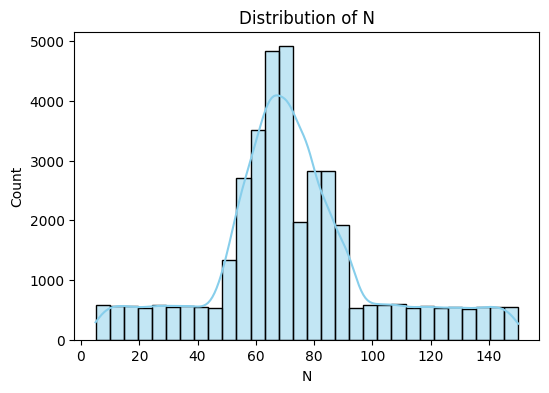

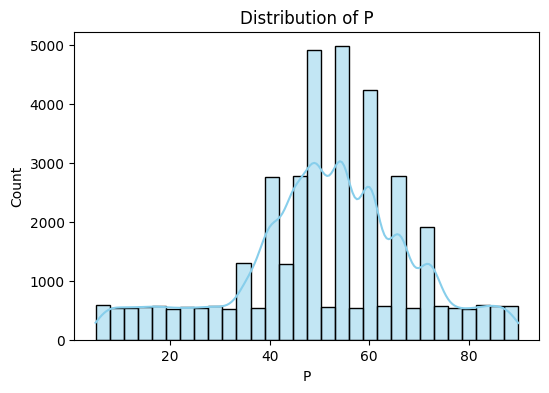

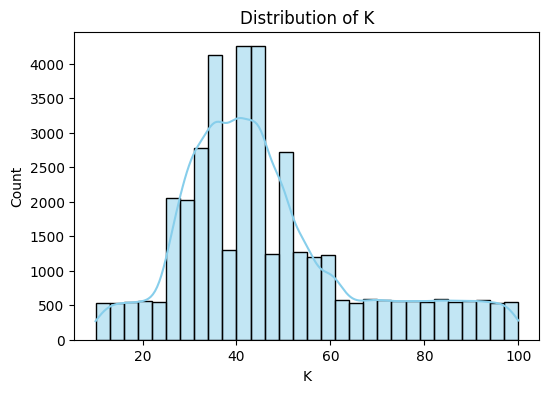

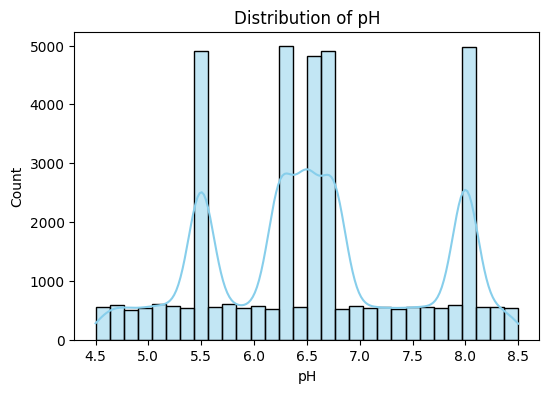

In [46]:
num_cols = ["N", "P", "K", "pH"]
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

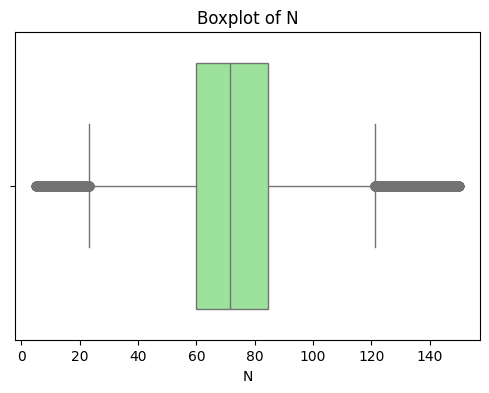

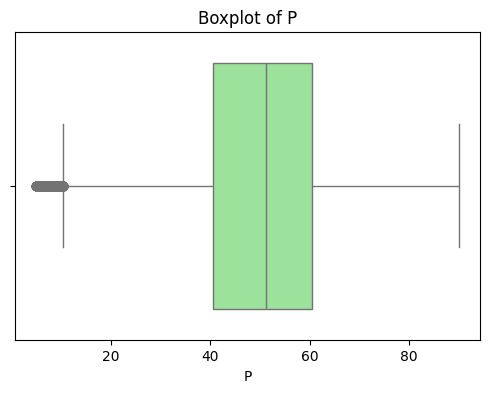

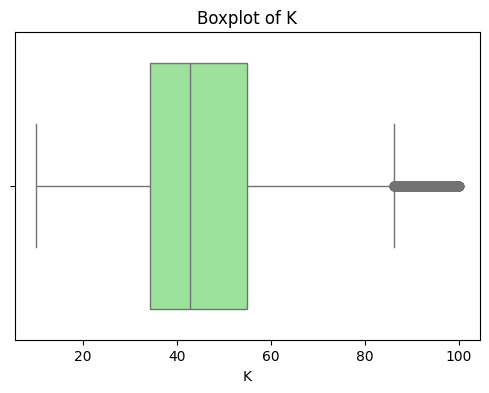

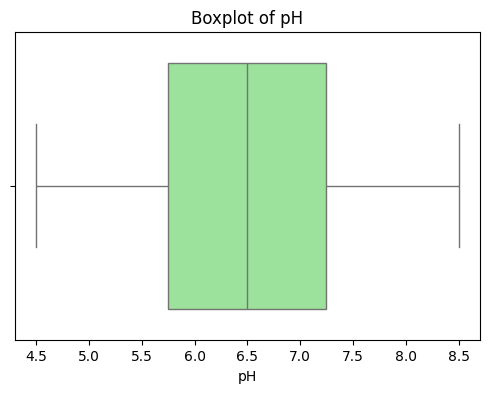

In [47]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color="lightgreen")
    plt.title(f"Boxplot of {col}")
    plt.show()


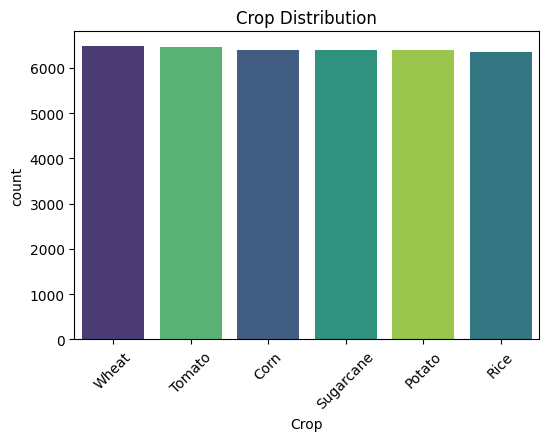

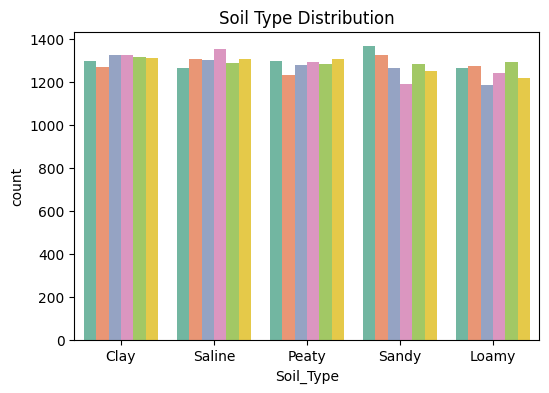

In [48]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Crop", order=df["Crop"].value_counts().index, palette="viridis", hue="Crop",legend=False)
plt.xticks(rotation=45)
plt.title("Crop Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Soil_Type", order=df["Soil_Type"].value_counts().index, palette="Set2", hue="Crop",legend=False)
plt.title("Soil Type Distribution")
plt.show()